In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/Unsupervised Learning Mahesh Anand/iris.csv",header=None,names=['f1','f2','f3','f4','class'])

In [0]:
df.head()

,f1,f2,f3,f4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [0]:
df2 = df.loc[:, 'f1':'f4']

In [0]:
df2.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


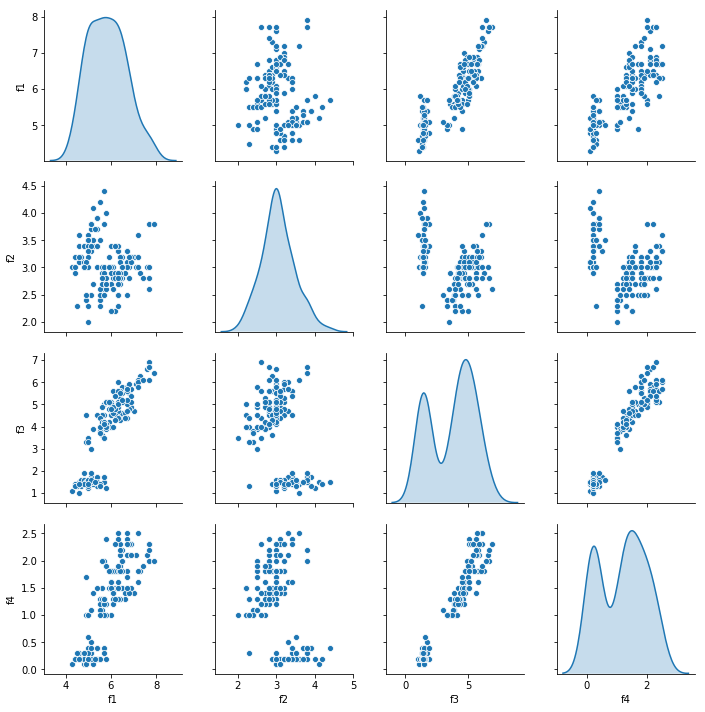

In [0]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [0]:
df_scaled = df2.apply(zscore)


In [0]:
df_scaled.head()

,f1,f2,f3,f4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [0]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.429708
4,5,91.191970
5,6,80.204334
6,7,72.409561
7,8,63.795006
8,9,54.812011
9,10,47.608553


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

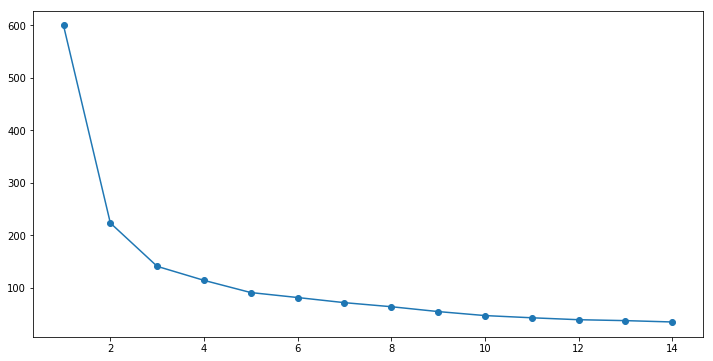

In [0]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [0]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [0]:
centroids=kmeans.cluster_centers_

In [0]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [0]:
centroid_df

,f1,f2,f3,f4
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [0]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [0]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [0]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)


In [0]:
df0.head()

,f1,f2,f3,f4,labels
50,1.401508,0.337848,0.535296,0.264699,0
51,0.674501,0.337848,0.421564,0.396172,0
52,1.280340,0.106445,0.649027,0.396172,0
56,0.553333,0.569251,0.535296,0.527645,0
65,1.038005,0.106445,0.364699,0.264699,0


In [0]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [0]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [0]:
tot_I=I0+I1+I2
print(tot_I)

140.96581663074699


In [0]:
kmeans.inertia_

140.96581663074699

In [0]:
#Linkage based euclidean distance updation calculation

from scipy.spatial.distance import cdist
D=np.array([[4,11.6],[8.2,7.9],[3.4,4.1],[7.8,20.2],[3.9,8.2],[9.2,8.1],[4.1,2.1]])
dist=cdist(D,D)
print(dist)

[[ 0.          5.59732079  7.52396172  9.40212742  3.40147027  6.26817358
   9.5005263 ]
 [ 5.59732079  0.          6.12209115 12.30650235  4.31045241  1.0198039
   7.10281634]
 [ 7.52396172  6.12209115  0.         16.69041641  4.13037529  7.04556598
   2.11896201]
 [ 9.40212742 12.30650235 16.69041641  0.         12.61784451 12.18072247
  18.47430648]
 [ 3.40147027  4.31045241  4.13037529 12.61784451  0.          5.30094331
   6.10327781]
 [ 6.26817358  1.0198039   7.04556598 12.18072247  5.30094331  0.
   7.87464285]
 [ 9.5005263   7.10281634  2.11896201 18.47430648  6.10327781  7.87464285
   0.        ]]


In [0]:
from sklearn.cluster import AgglomerativeClustering 

In [0]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [0]:
model2.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
L=pd.DataFrame(model2.labels_)
L[0].value_counts()

0    71
1    49
2    30
Name: 0, dtype: int64

In [0]:
## creating a new dataframe only for labels and converting it into categorical variable
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['labels']))

AGC_labels['labels'] = AGC_labels['labels'].astype('category')

In [0]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_AGC_labeled = df_scaled.join(AGC_labels)

In [0]:
AGC_clusters = iris_AGC_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [0]:
(Df0.shape,Df1.shape,Df2.shape)

((71, 5), (49, 5), (30, 5))

In [0]:
C0=np.array([Df0['f1'].mean(),Df0['f2'].mean(),Df0['f3'].mean(),Df0['f4'].mean()])
C1=np.array([Df1['f1'].mean(),Df1['f2'].mean(),Df1['f3'].mean(),Df1['f4'].mean()])
C2=np.array([Df2['f1'].mean(),Df2['f2'].mean(),Df2['f3'].mean(),Df2['f4'].mean()])


In [0]:
C0

array([ 0.85198648, -0.14125358,  0.85806877,  0.86280834])

In [0]:
C1

array([-1.00206653,  0.89510445, -1.30297509, -1.25663117])

In [0]:
C2

array([-0.37965933, -1.12770378,  0.09742991,  0.01051784])

In [0]:
Df1

,f1,f2,f3,f4,labels
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1
5,-0.537178,1.957669,-1.170675,-1.050031,1
6,-1.506521,0.800654,-1.341272,-1.181504,1
7,-1.021849,0.800654,-1.284407,-1.312977,1
8,-1.748856,-0.356361,-1.341272,-1.312977,1
9,-1.143017,0.106445,-1.284407,-1.444450,1


In [0]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)

In [0]:
AGC_I0+AGC_I1+AGC_I2

150.1223254726958

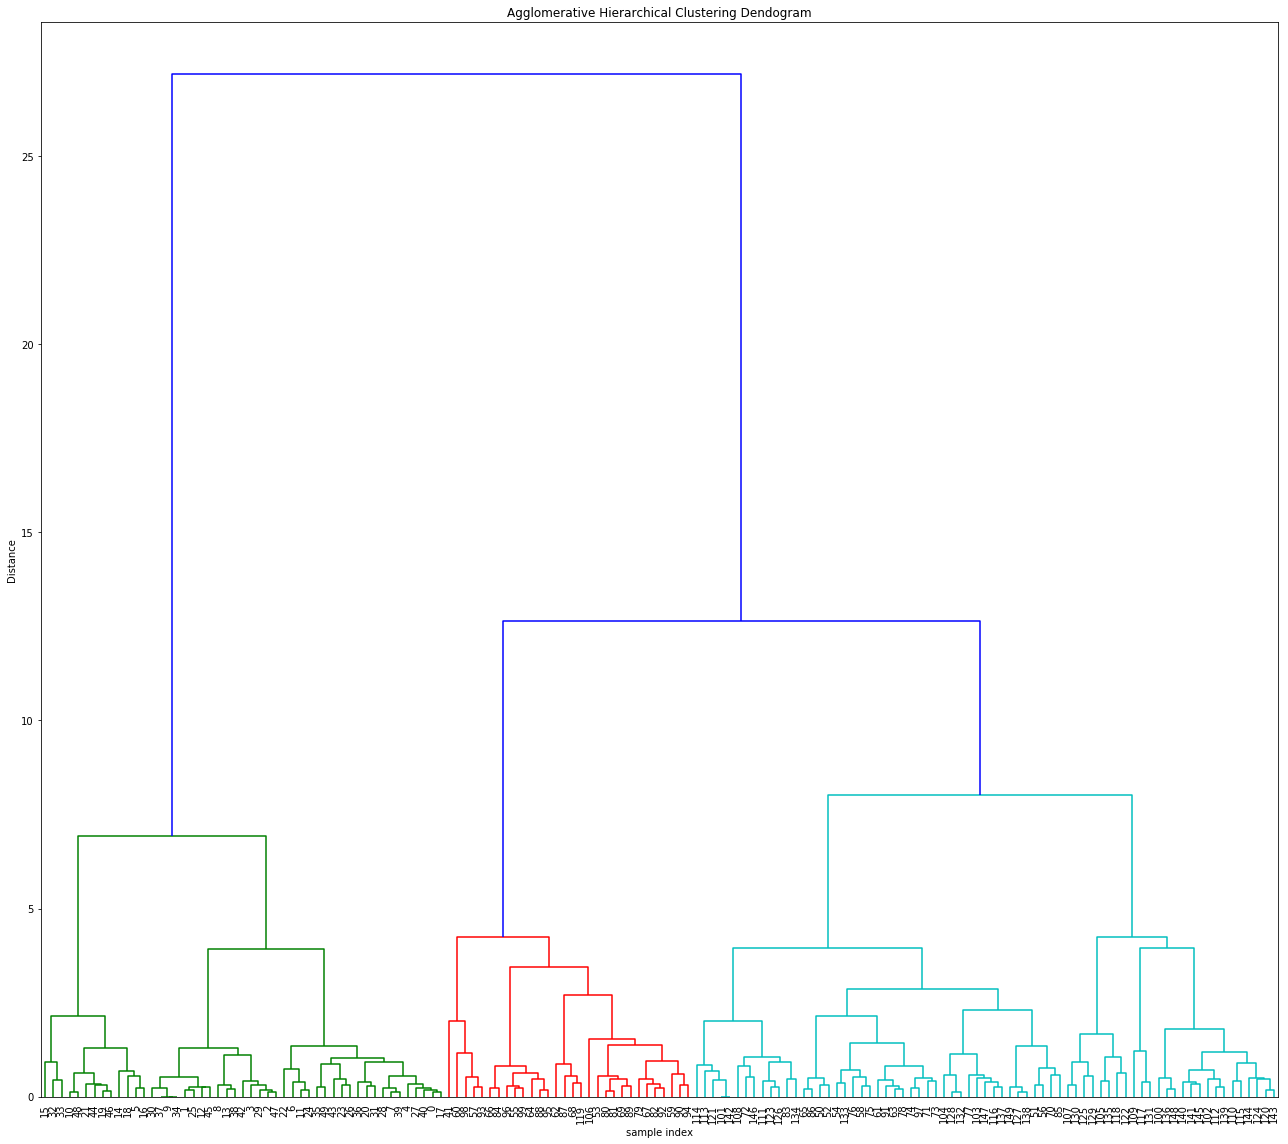

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [0]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

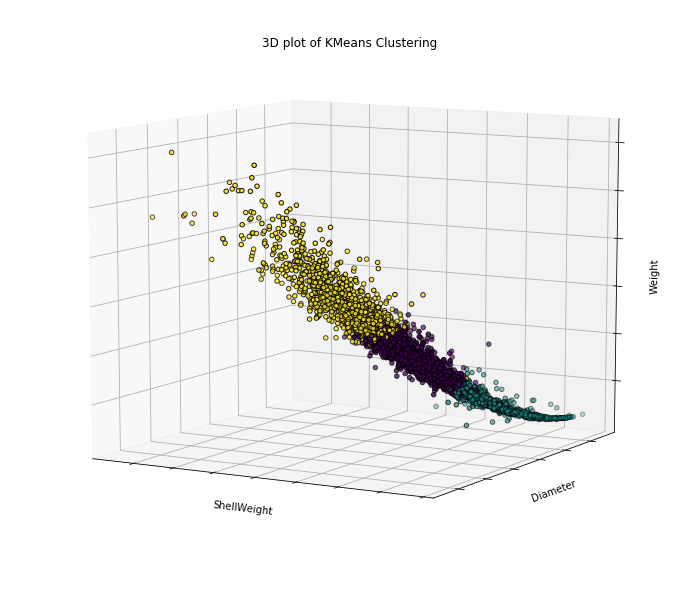

In [0]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=120)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 6], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],
           c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('ShellWeight')
ax.set_ylabel('Diameter')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
